In [120]:
import pandas as pd
import pingouin as pg
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [121]:
df = pandas.read_csv('nationwide_data.csv', low_memory=False)


In [101]:
print(df.shape)

# Print column names.
for col in df.columns:
    print(col)


(5937, 188)
agency_name
location_name
agency_type
state
fips_state_code
fips_place_code
fips_county_code
fips_county_sub_code
latitude
longitude
ori
total_population
white_population
black_population
hispanic_population
asian_pacific_population
other_population
mayor_name
mayor_email
mayor_phone
mayor_contact_url
police_chief_name
police_chief_email
police_chief_phone
police_chief_contact_url
less_lethal_force_2016
less_lethal_force_2017
less_lethal_force_2018
police_shootings_2016
police_shootings_2017
police_shootings_2018
white_people_killed
black_people_killed
hispanic_people_killed
asian_pacific_people_killed
other_people_killed
unarmed_people_killed
vehicle_people_killed
armed_people_killed
fatality_rate
shot_first
people_killed_or_injured_armed_with_gun
people_killed_or_injured_gun_perceived
people_killed_or_injured_unarmed
people_killed_or_injured_vehicle_incident
people_killed_or_injured_black
people_killed_or_injured_white
people_killed_or_injured_hispanic
people_killed_or_in

In [192]:
df2 = df.copy()

# Strip dollar sign, cast police budget column as a float.
df2['police_budget'] = df2['police_budget'].str.replace(',', '')
df2['police_budget'] = df2['police_budget'].str.replace('$', '')
df2['police_budget'] = df2['police_budget'].astype('float64')

df2['all_people_killed'] = (df2['white_people_killed'] 
                                 + df2['black_people_killed'] 
                                 +  df2['hispanic_people_killed'] 
                                 +  df2['asian_pacific_people_killed']
                                 + df2['other_people_killed'])

df2['less_lethal_force_all'] = (df2['less_lethal_force_2016'] +
                               df2['less_lethal_force_2017'] + 
                               df2['less_lethal_force_2018'])

df2['percent homicides solved'] = df2['homicides_2013_2018_solved']/df2['homicides_2013_2018']


In [181]:
pg.partial_corr(data=df2, x='police_budget', y='all_people_killed', covar='homicides_2013_2018')

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,2698,0.477186,"[0.45, 0.51]",0.227706,0.227133,1.730972e-153,3.463e+149,1.0


In [182]:
pg.partial_corr(data=df2, x='police_budget', y='less_lethal_force_all', covar='homicides_2013_2018')

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,86,0.633333,"[0.49, 0.75]",0.401111,0.38668,6.000537e-11,1.851e+08,0.999999


In [205]:
pc0 = pg.partial_corr(data=df2, x='police_budget', y='all_people_killed', covar='homicides_2013_2018')
pc1 = pg.partial_corr(data=df2, x='police_budget', y='less_lethal_force_all', covar='homicides_2013_2018')
pc2 = pg.partial_corr(data=df2, x='less_lethal_force_all', y='all_people_killed', covar='homicides_2013_2018')
pc3 = pg.partial_corr(data=df2, x='police_budget', y='percent homicides solved', covar='homicides_2013_2018')


r0 = float(pc0['r'])
r1 = float(pc1['r'])
r2 = float(pc2['r'])


TypeError: No loop matching the specified signature and casting was found for ufunc add

In [211]:
def partial_correlation_matrix(df2, variables, control_var):
    n = len(variables)
    corr = np.zeros((n, n))
    for i, var1 in enumerate(variables):
        for j, var2 in enumerate(variables):
#             print(var1)
#             print(var2)
            if var1 == var2:
                r = 1.0
            else:
                r = float(pg.partial_corr(data=df2, x=var1, y=var2, covar=control_var)['r'])
            corr[i, j] = r
    return corr

In [218]:
corr = partial_correlation_matrix(df2, ['police_budget', 'all_people_killed', 'less_lethal_force_all', 'percent homicides solved'], 'homicides_2013_2018')
corrdf = pd.DataFrame(data=corr, index=['Police budget', 'Non-lethal force incidents', 'Lethal force incidents', 'Percent Homicides Solved'], columns=['Police budget', 'Non-lethal force incidents', 'Lethal force incidents', 'Percent Homicides Solved'])


In [213]:
def correlation_heatmap(corr, title):
    sns.set(style="white")

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corrdf, dtype=np.bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corrdf, mask=mask, cmap=cmap, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
    plt.yticks(rotation=0) 

    plt.title(title, fontsize=20)
    plt.show()
   

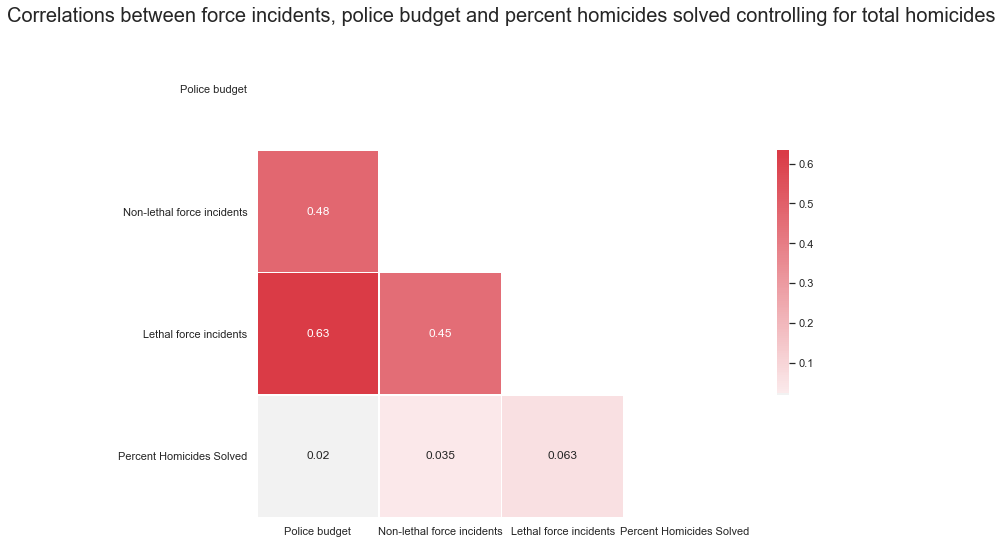

In [219]:
correlation_heatmap(corrdf, 'Correlations between force incidents, police budget and percent homicides solved controlling for total homicides')